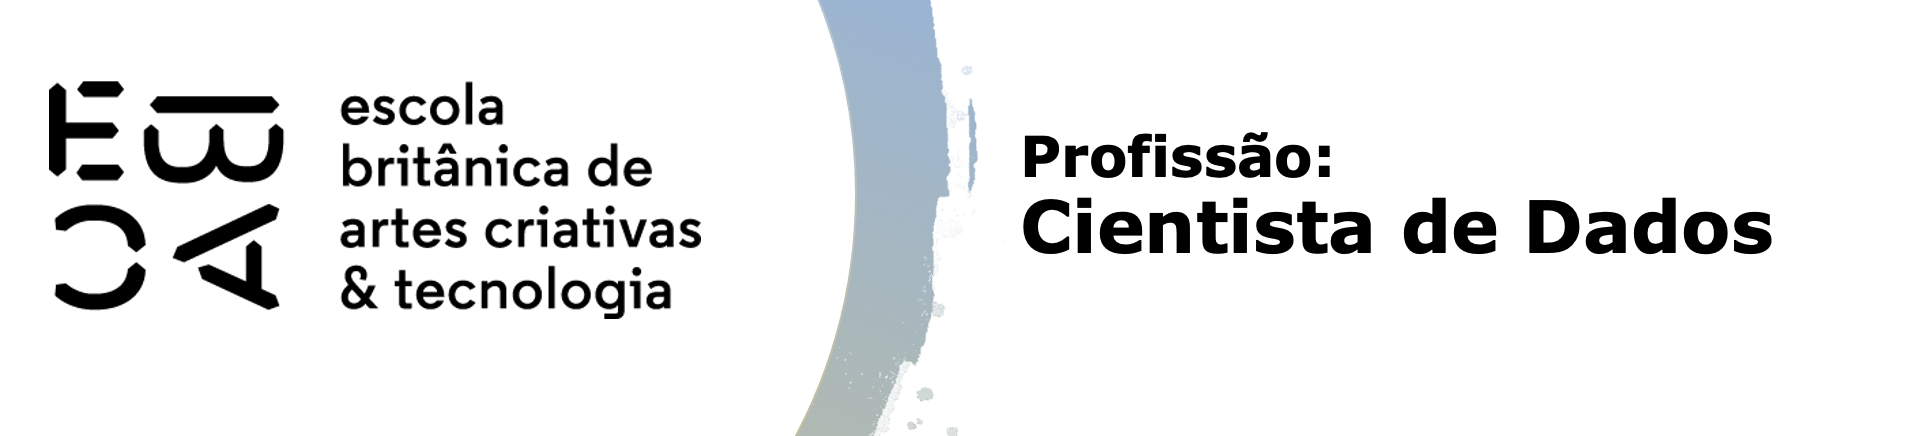

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [280]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings("ignore")

In [314]:
X_train = pd.read_csv('./train/X_train_subset.csv')
X_train.set_index(['individuo'], inplace=True)
X_train.index.name = 'individuo'
X_train = X_train.reset_index().set_index(['individuo', X_train.index])
X_train = X_train.drop(columns='individuo.1')

X_test = pd.read_csv('./test/X_test_subset.csv')
X_test = X_test.drop(X_test.index[0])
X_test.set_index(['individuo'], inplace=True)
X_test.index.name = 'individuo'
X_test = X_test.reset_index().set_index(['individuo', X_test.index])
X_test = X_test.drop(columns='individuo.1')

y_train = pd.read_csv('./train/y_train.txt')
y_train.columns = ['y']

y_test = pd.read_csv('./test/y_test.txt')
y_test.columns = ['y']

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [284]:
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=100)
caminho = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [286]:
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alphas

array([0.00000000e+00, 1.20920812e-06, 6.18345061e-06, 6.49684187e-06,
       6.56427265e-06, 6.65117065e-06, 7.68898641e-06, 8.05110508e-06,
       8.26884964e-06, 8.70467899e-06, 8.99220445e-06, 9.29830915e-06,
       9.48129094e-06, 1.07647467e-05, 1.13885673e-05, 1.15732046e-05,
       1.19344390e-05, 1.24375692e-05, 1.47050827e-05, 1.55634308e-05,
       1.74183551e-05, 1.92467945e-05, 2.03909612e-05, 2.16546964e-05,
       2.17279584e-05, 2.23187174e-05, 2.25399715e-05, 2.30848823e-05,
       2.43726740e-05, 2.71479078e-05, 2.74435017e-05, 2.98572330e-05,
       3.07559457e-05, 3.17417131e-05, 3.26486192e-05, 3.29195133e-05,
       3.44130109e-05, 3.53928935e-05, 3.65735899e-05, 3.86787653e-05,
       4.36831704e-05, 4.53194912e-05, 4.54424875e-05, 4.60848382e-05,
       4.72842983e-05, 4.78922420e-05, 4.80156270e-05, 4.93534076e-05,
       4.97806910e-05, 5.38229049e-05, 5.71350837e-05, 6.60174286e-05,
       6.82228134e-05, 6.87737118e-05, 7.11714068e-05, 7.50527520e-05,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [288]:
%%time
clf = DecisionTreeClassifier(random_state=100)
parametros_grid = {'ccp_alpha': ccp_alphas}
grid = GridSearchCV(estimator=clf, param_grid=parametros_grid, cv=10, verbose=100)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 153 candidates, totalling 1530 fits
[CV 1/10; 1/153] START ccp_alpha=0.0............................................
[CV 1/10; 1/153] END .............ccp_alpha=0.0;, score=0.704 total time=   0.0s
[CV 2/10; 1/153] START ccp_alpha=0.0............................................
[CV 2/10; 1/153] END .............ccp_alpha=0.0;, score=0.664 total time=   0.0s
[CV 3/10; 1/153] START ccp_alpha=0.0............................................
[CV 3/10; 1/153] END .............ccp_alpha=0.0;, score=0.713 total time=   0.0s
[CV 4/10; 1/153] START ccp_alpha=0.0............................................
[CV 4/10; 1/153] END .............ccp_alpha=0.0;, score=0.573 total time=   0.0s
[CV 5/10; 1/153] START ccp_alpha=0.0............................................
[CV 5/10; 1/153] END .............ccp_alpha=0.0;, score=0.659 total time=   0.0s
[CV 6/10; 1/153] START ccp_alpha=0.0............................................
[CV 6/10; 1/153] END .............ccp_alpha=

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.20920812e-06, 6.18345061e-06, 6.49684187e-06,
       6.56427265e-06, 6.65117065e-06, 7.68898641e-06, 8.05110508e-06,
       8.26884964e-06, 8.70467899e-06, 8.99220445e-06, 9.29830915e-06,
       9.48129094e-06, 1.07647467e-05, 1.13885673e-05, 1.15732046e-05,
       1.1934439...
       1.52650712e-03, 1.56788131e-03, 1.89043849e-03, 1.94421211e-03,
       1.97170935e-03, 1.97580945e-03, 1.98817010e-03, 2.08339871e-03,
       2.65317047e-03, 2.88338082e-03, 3.51286308e-03, 3.58691435e-03,
       3.87782543e-03, 4.29197957e-03, 4.93157533e-03, 5.74598793e-03,
       6.93039137e-03, 6.95569948e-03, 9.64445423e-03, 9.92922013e-03,
       2.47991759e-02, 3.57488858e-02, 9.84937910e-02, 1.59612074e-01,
       1.72473360e-01])},
             verbose=100)

In [290]:
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.20920812e-06, 6.18345061e-06, 6.49684187e-06,
       6.56427265e-06, 6.65117065e-06, 7.68898641e-06, 8.05110508e-06,
       8.26884964e-06, 8.70467899e-06, 8.99220445e-06, 9.29830915e-06,
       9.48129094e-06, 1.07647467e-05, 1.13885673e-05, 1.15732046e-05,
       1.1934439...
       1.52650712e-03, 1.56788131e-03, 1.89043849e-03, 1.94421211e-03,
       1.97170935e-03, 1.97580945e-03, 1.98817010e-03, 2.08339871e-03,
       2.65317047e-03, 2.88338082e-03, 3.51286308e-03, 3.58691435e-03,
       3.87782543e-03, 4.29197957e-03, 4.93157533e-03, 5.74598793e-03,
       6.93039137e-03, 6.95569948e-03, 9.64445423e-03, 9.92922013e-03,
       2.47991759e-02, 3.57488858e-02, 9.84937910e-02, 1.59612074e-01,
       1.72473360e-01])},
             verbose=100)

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [292]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019274,0.001232,0.002026,0.000043,0.000000,{'ccp_alpha': 0.0},0.703804,0.663946,0.712925,0.572789,0.658503,0.568707,0.707483,0.693878,0.733333,0.745578,0.676095,0.058473,85
1,0.019200,0.002053,0.002000,0.000014,0.000001,{'ccp_alpha': 1.2092081198324112e-06},0.703804,0.663946,0.712925,0.572789,0.658503,0.568707,0.707483,0.693878,0.733333,0.745578,0.676095,0.058473,85
2,0.019111,0.000540,0.001800,0.000401,0.000006,{'ccp_alpha': 6.183450612780235e-06},0.703804,0.663946,0.712925,0.572789,0.658503,0.568707,0.707483,0.693878,0.733333,0.745578,0.676095,0.058473,85
3,0.020105,0.001213,0.001706,0.000643,0.000006,{'ccp_alpha': 6.496841871907297e-06},0.703804,0.663946,0.712925,0.572789,0.658503,0.568707,0.707483,0.693878,0.733333,0.745578,0.676095,0.058473,85
4,0.020112,0.001874,0.001774,0.000389,0.000007,{'ccp_alpha': 6.564272650519648e-06},0.703804,0.663946,0.712925,0.572789,0.658503,0.568707,0.707483,0.693878,0.733333,0.745578,0.676095,0.058473,85


In [294]:
melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(ccp_alpha=melhor_ccp, random_state=100).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7118126272912424

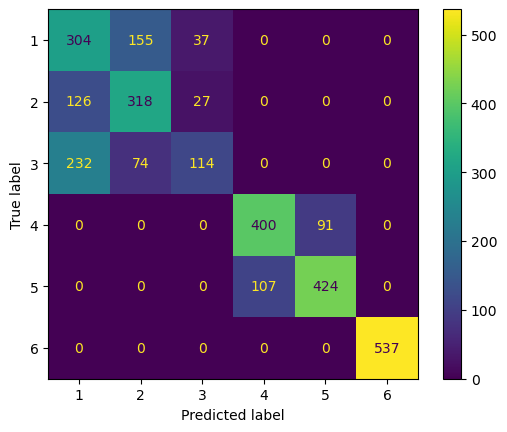

In [304]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [319]:
df_var = pd.read_csv('features.txt', header=None, delim_whitespace=True)
features = df_var[1].tolist()

df_sub = pd.read_csv('./train/subject_train.txt', header=None, delim_whitespace=True)

X_train = pd.read_csv('./train/X_train.txt', header=None, delim_whitespace=True)
X_train = X_train.drop(X_train.index[-1])
X_train.columns = features
X_train['individuo'] = df_sub[0]
X_train.set_index(['individuo'], inplace=True)
X_train.index.name = 'individuo'
X_train = X_train.reset_index().set_index(['individuo', X_train.index])
X_train

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
individuo individuo                                                            
1         1                   0.288585          -0.020294          -0.132905   
          1                   0.278419          -0.016411          -0.123520   
          1                   0.279653          -0.019467          -0.113462   
          1                   0.279174          -0.026201          -0.123283   
          1                   0.276629          -0.016570          -0.115362   
...                                ...                ...                ...   
30        30                  0.237966          -0.001088          -0.148326   
          30                  0.299665          -0.057193          -0.181233   
          30                  0.273853          -0.007749          -0.147468   
          30                  0.273387          -0.017011          -0.045022   
          30                  0.289654          -0.018843          -0.158281   

                     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
individuo individuo                                                         
1         1                 -0.995279         -0.983111         -0.913526   
          1                 -0.998245         -0.975300         -0.960322   
          1                 -0.995380         -0.967187         -0.978944   
          1                 -0.996091         -0.983403         -0.990675   
          1                 -0.998139         -0.980817         -0.990482   
...                               ...               ...               ...   
30        30                -0.218949         -0.012927          0.170019   
          30                -0.195387          0.039905          0.077078   
          30                -0.235309          0.004816          0.059280   
          30                -0.218218         -0.103822          0.274533   
          30                -0.219139         -0.111412          0.268893   

                     tBodyAcc-mad()-X  tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  \
individuo individuo                                                         
1         1                 -0.995112         -0.983185         -0.923527   
          1                 -0.998807         -0.974914         -0.957686   
          1                 -0.996520         -0.963668         -0.977469   
          1                 -0.997099         -0.982750         -0.989302   
          1                 -0.998321         -0.979672         -0.990441   
...                               ...               ...               ...   
30        30                -0.309599         -0.041392          0.207454   
          30                -0.282301          0.043616          0.060410   
          30                -0.322552         -0.029456          0.080585   
          30                -0.304515         -0.098913          0.332584   
          30                -0.310487         -0.068200          0.319473   

                     tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-meanFreq()  \
individuo individuo                    ...                                    
1         1                 -0.934724  ...                        -0.074323   
          1                 -0.943068  ...                         0.158075   
          1                 -0.938692  ...                         0.414503   
          1                 -0.938692  ...                         0.404573   
          1                 -0.942469  ...                         0.087753   
...                               ...  ...                              ...   
30        30                 0.210795  ...                        -0.028664   
          30                 0.210795  ...                        -0.070157   
          30                 0.117440  ...                         0.165259   
          30                 0.043999  ...                         0.195034   
          30                

In [321]:
df_var = pd.read_csv('features.txt', header=None, delim_whitespace=True)
features = df_var[1].tolist()

df_sub = pd.read_csv('./train/subject_train.txt', header=None, delim_whitespace=True)

X_test = pd.read_csv('./test/X_test.txt', header=None, delim_whitespace=True)
X_test = X_test.drop(X_test.index[-1])
X_test.columns = features
X_test['individuo'] = df_sub[0]
X_test.set_index(['individuo'], inplace=True)
X_test.index.name = 'individuo'
X_test = X_test.reset_index().set_index(['individuo', X_test.index])
X_test

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
individuo individuo                                                            
1         1                   0.257178          -0.023285          -0.014654   
          1                   0.286027          -0.013163          -0.119083   
          1                   0.275485          -0.026050          -0.118152   
          1                   0.270298          -0.032614          -0.117520   
          1                   0.274833          -0.027848          -0.129527   
...                                ...                ...                ...   
16        16                  0.192275          -0.033643          -0.105949   
          16                  0.310155          -0.053391          -0.099109   
          16                  0.363385          -0.039214          -0.105915   
          16                  0.349966           0.030077          -0.115788   
          16                  0.237594           0.018467          -0.096499   

                     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
individuo individuo                                                         
1         1                 -0.938404         -0.920091         -0.667683   
          1                 -0.975415         -0.967458         -0.944958   
          1                 -0.993819         -0.969926         -0.962748   
          1                 -0.994743         -0.973268         -0.967091   
          1                 -0.993852         -0.967445         -0.978295   
...                               ...               ...               ...   
16        16                -0.354841         -0.092504         -0.312910   
          16                -0.287866         -0.140589         -0.215088   
          16                -0.305388          0.028148         -0.196373   
          16                -0.329638         -0.042143         -0.250181   
          16                -0.323114         -0.229775         -0.207574   

                     tBodyAcc-mad()-X  tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  \
individuo individuo                                                         
1         1                 -0.952501         -0.925249         -0.674302   
          1                 -0.986799         -0.968401         -0.945823   
          1                 -0.994403         -0.970735         -0.963483   
          1                 -0.995274         -0.974471         -0.968897   
          1                 -0.994111         -0.965953         -0.977346   
...                               ...               ...               ...   
16        16                -0.433579         -0.088741         -0.336060   
          16                -0.356083         -0.148775         -0.232057   
          16                -0.373540         -0.030036         -0.270237   
          16                -0.388017         -0.133257         -0.347029   
          16                -0.392380         -0.279610         -0.289477   

                     tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-meanFreq()  \
individuo individuo                    ...                                    
1         1                 -0.894088  ...                         0.071645   
          1                 -0.894088  ...                        -0.401189   
          1                 -0.939260  ...                         0.062891   
          1                 -0.938610  ...                         0.116695   
          1                 -0.938610  ...                        -0.121711   
...                               ...  ...                              ...   
16        16                -0.041624  ...                         0.158728   
          16                 0.185361  ...                         0.074472   
          16                 0.185361  ...                         0.101859   
          16                 0.007471  ...                        -0.066249   
          16                

In [316]:
y_train_dummy = pd.get_dummies(y_train['y'])
y_train_cut = y_train_dummy[2].to_frame().astype(int)
y_train_cut

,2
0,0
1,0
2,0
3,0
4,0
...,...
7346,1
7347,1
7348,1
7349,1


In [358]:
y_test_dummy = pd.get_dummies(y_test['y'])
y_test_cut = y_test_dummy[2].to_frame().astype(int)
y_test_cut

,2
0,0
1,0
2,0
3,0
4,0
...,...
2941,1
2942,1
2943,1
2944,1


In [338]:
clf = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4, random_state=20145).fit(X_train, y_train_cut)

importances = clf.feature_importances_

importances_df = pd.DataFrame({'feature': X_train.columns, 'importances': importances})
importances_df = importances_df.sort_values(by='importances', ascending=False)
print(importances_df)

                         feature  importances
330   fBodyAcc-bandsEnergy()-1,8     0.325909
74     tGravityAcc-arCoeff()-Z,2     0.321116
53           tGravityAcc-min()-Y     0.107702
559         angle(Y,gravityMean)     0.063996
516    fBodyBodyAccJerkMag-std()     0.043470
..                           ...          ...
186  tBodyGyroJerk-arCoeff()-X,2     0.000000
185  tBodyGyroJerk-arCoeff()-X,1     0.000000
184    tBodyGyroJerk-entropy()-Z     0.000000
183    tBodyGyroJerk-entropy()-Y     0.000000
560         angle(Z,gravityMean)     0.000000

[561 rows x 2 columns]


In [346]:
X_train = X_train[['fBodyAcc-bandsEnergy()-1,8', 'tGravityAcc-arCoeff()-Z,2', 'tGravityAcc-min()-Y']]
X_test = X_test[['fBodyAcc-bandsEnergy()-1,8', 'tGravityAcc-arCoeff()-Z,2', 'tGravityAcc-min()-Y']]

In [348]:
caminho = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4, random_state=20145).cost_complexity_pruning_path(X_train, y_train_cut)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alphas

array([0.00000000e+00, 7.69466698e-06, 2.89784948e-04, 3.07817515e-04,
       1.21161476e-03, 1.65196991e-03, 1.78639991e-03, 3.49373190e-03,
       3.62142675e-03, 7.82356416e-03, 1.04071244e-02, 1.06492067e-02,
       6.32088915e-02, 6.41522373e-02])

In [350]:
clf = DecisionTreeClassifier(random_state=100)
parametros_grid = {'ccp_alpha': ccp_alphas}
grid = GridSearchCV(estimator=clf, param_grid=parametros_grid, cv=10, verbose=100)
grid.fit(X_train, y_train_cut)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV 1/10; 1/14] START ccp_alpha=0.0.............................................
[CV 1/10; 1/14] END ..............ccp_alpha=0.0;, score=0.942 total time=   0.0s
[CV 2/10; 1/14] START ccp_alpha=0.0.............................................
[CV 2/10; 1/14] END ..............ccp_alpha=0.0;, score=0.886 total time=   0.0s
[CV 3/10; 1/14] START ccp_alpha=0.0.............................................
[CV 3/10; 1/14] END ..............ccp_alpha=0.0;, score=0.936 total time=   0.0s
[CV 4/10; 1/14] START ccp_alpha=0.0.............................................
[CV 4/10; 1/14] END ..............ccp_alpha=0.0;, score=0.893 total time=   0.0s
[CV 5/10; 1/14] START ccp_alpha=0.0.............................................
[CV 5/10; 1/14] END ..............ccp_alpha=0.0;, score=0.907 total time=   0.0s
[CV 6/10; 1/14] START ccp_alpha=0.0.............................................
[CV 6/10; 1/14] END ..............ccp_alpha=0.

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'ccp_alpha': array([0.00000000e+00, 7.69466698e-06, 2.89784948e-04, 3.07817515e-04,
       1.21161476e-03, 1.65196991e-03, 1.78639991e-03, 3.49373190e-03,
       3.62142675e-03, 7.82356416e-03, 1.04071244e-02, 1.06492067e-02,
       6.32088915e-02, 6.41522373e-02])},
             verbose=100)

In [352]:
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'ccp_alpha': array([0.00000000e+00, 7.69466698e-06, 2.89784948e-04, 3.07817515e-04,
       1.21161476e-03, 1.65196991e-03, 1.78639991e-03, 3.49373190e-03,
       3.62142675e-03, 7.82356416e-03, 1.04071244e-02, 1.06492067e-02,
       6.32088915e-02, 6.41522373e-02])},
             verbose=100)

In [354]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021655,0.002850,0.001970,0.000829,0.000000,{'ccp_alpha': 0.0},0.941576,0.885714,0.936054,0.892517,0.907483,0.873469,0.931973,0.926531,0.956463,0.946939,0.919872,0.026864,8
1,0.019900,0.002256,0.001600,0.000490,0.000008,{'ccp_alpha': 7.6946669797847e-06},0.941576,0.885714,0.936054,0.892517,0.907483,0.873469,0.931973,0.926531,0.956463,0.946939,0.919872,0.026864,8
2,0.020300,0.001791,0.001400,0.000490,0.000290,{'ccp_alpha': 0.00028978494825194915},0.940217,0.900680,0.946939,0.907483,0.912925,0.902041,0.938776,0.918367,0.957823,0.968707,0.929396,0.023048,3
3,0.020300,0.002052,0.001500,0.000671,0.000308,{'ccp_alpha': 0.0003078175152269381},0.941576,0.907483,0.951020,0.908844,0.912925,0.900680,0.938776,0.918367,0.957823,0.968707,0.930620,0.022721,1
4,0.020093,0.001580,0.001808,0.000404,0.001212,{'ccp_alpha': 0.0012116147635415006},0.949728,0.899320,0.955102,0.910204,0.926531,0.857143,0.959184,0.904762,0.967347,0.967347,0.929667,0.034568,2


In [360]:
melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(ccp_alpha=melhor_ccp, random_state=100).fit(X_train, y_train_cut)
clf.score(X_test, y_test_cut)

0.9012219959266803

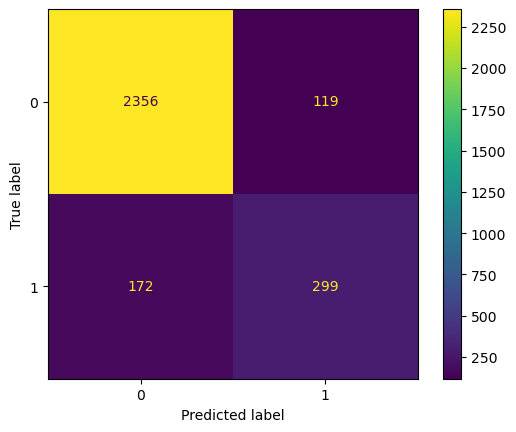

In [364]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test_cut)